<a href="https://colab.research.google.com/github/hanan-achmad/Alignment-Scoring/blob/main/Alignment_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sequence Alignment**
#### Membandingkan dan menghitung score kemiripan antara *mouse sequence* dan *rat sequence*.

## **Import Library dan baca file**
library yang digunakan untuk membaca file fasta (BioPython) dan untuk membuat Dotplot (Matplotlib).

In [ ]:
!pip install BioPython
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.1 MB/s eta 0:00:00


Upload dan membaca file mouse.fasta dan rat.fasta

```
def read_fasta(file):
    return [str(record.seq) for record in SeqIO.parse(file, "fasta")]
```
>Fungsi untuk membaca file fasta dan mengembalikan *sequence* yang terdapat dalam file tersebut.

```
for nama_file in nama_file:
  uploaded_file = files.upload()
```
>Iterasi untuk upload file, setelah kedua file diupload, akan dipanggil fungsi read_fasta() untuk membaca *sequence* dari kedua file tersebut. Hasil pembacaan disimpan dalam variabel `mouse_seq` dan `rat_seq`.

In [ ]:
# Fungsi membaca file fasta
def read_fasta(file):
    return [str(record.seq) for record in SeqIO.parse(file, "fasta")]

# Upload file fasta
nama_file = ['mouse.fasta', 'rat.fasta']

for nama_file in nama_file:
  uploaded_file = files.upload()
  with open(nama_file, 'wb') as f:
    f.write(next(iter(uploaded_file.values())))

# Membaca file fasta
mouse_seq = read_fasta('mouse.fasta')
rat_seq = read_fasta('rat.fasta')

print(mouse_seq)
print(rat_seq)

Saving mouse.fasta to mouse.fasta


Saving rat.fasta to rat.fasta
['MDIAIHHPWIRRPFFPFHSPSRLFDQFFGEHLLESDLFSTATSLSPFYLRPPSFLRAPSWIDTGLSEMRLEKDRFSVNLDVKHFSPEELKVKVLGDVIEVHGKHEERQDEHGFISREFHRKYRIPADVDPLAITSSLSSDGVLTVNGPRKQVSGPERTIPITREEKPAVAAAPKK']
['MDIAIHHPWIRRPFFPFHSPSRLFDQFFGEHLLESDLFSTATSLSPFYLRPPSFLRAPSWIDTGLSEMRMEKDRFSVNLDVKHFSPEELKVKVLGDVIEVHGKHEERQDEHGFISREFHRKYRIPADVDPLTITSSLSSDGVLTVNGPRKQASGPERTIPITREEKPAVTAAPKK']


## **Dotplot**
 Dotplot untuk visualisasi perbandingan antara dua *sequence*, di mana titik-titik yang terbentuk pada dot plot menunjukkan lokasi kecocokan antara *sequence*.

 `dot_plot()` adalah fungsi untuk membuat dot plot antara dua *sequence*. Di dalam fungsi terdapat variabel `matrix` untuk menyimpan nilai-nilai 1 jika terdapat kesamaan antara karakter-karakter dalam `seq1_cut` dan `seq2_cut`.

Kemudian iterasi for digunakan untuk memeriksa setiap karakter dalam `seq1_cut` dan `seq2_cut`, jika karakter dalam kedua urutan sama, maka nilai dalam matriks `matrix` menjadi 1.

Setelah matriks matrix terisi, dot plot ditampilkan menggunakan matplotlib.

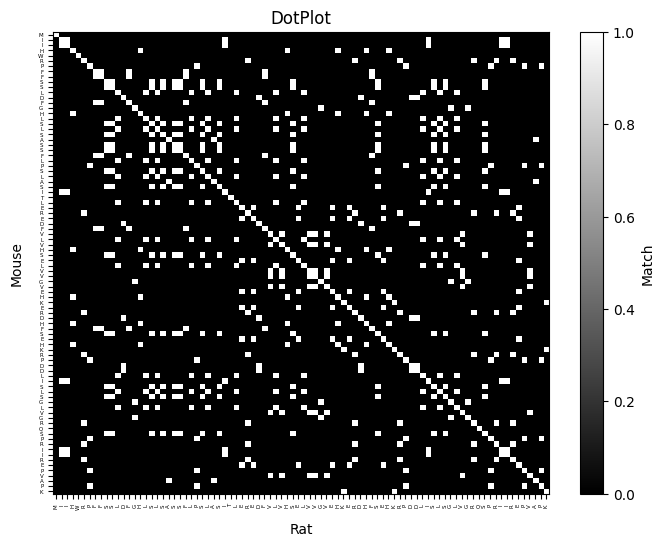

In [ ]:
# Fungsi untuk membuat dotplot
def dot_plot(seq1, seq2, cut_factor=2):
    seq1_cut = seq1[::cut_factor]
    seq2_cut = seq2[::cut_factor]

    # Inisialisasi matriks nol untuk dot plot
    matrix = np.zeros((len(seq1_cut), len(seq2_cut)), dtype=int)

    # Mengisi matriks dengan nilai 1 jika match
    for i in range(len(seq1_cut)):
        for j in range(len(seq2_cut)):
            if seq1_cut[i] == seq2_cut[j]:
                matrix[i][j] = 1

    # Plotting dotplot
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, cmap='gray', aspect='auto', interpolation='none')
    plt.title('DotPlot')
    plt.xlabel('Rat', labelpad=10)
    plt.ylabel('Mouse', labelpad=10)
    plt.xticks(range(len(seq2_cut)), seq2_cut, fontsize=4, rotation=90)
    plt.yticks(range(len(seq1_cut)), seq1_cut, fontsize=4)
    plt.colorbar(label='Match')
    plt.show()

mouse_sequence = mouse_seq[0]
rat_sequence = rat_seq[0]
dot_plot(mouse_sequence, rat_sequence)

## **Menghitung score**
Menghitung skor kemiripan antara *mouse sequence* dan *rat sequence*.

`score_seq()` adalah fungsi untuk menghitung skor kemiripan antara dua *sequence*. Didalam fungsi akan dilakukan iterasi terhadap dua *sequence* untuk memeriksa karakter antara keduanya, kemudian menghitung berapa banyak karakter yang cocok, dan mencatat karakter yang tidak cocok beserta posisinya.

Kemudian, hasil pemanggilan fungsi `score_seq()` akan disimpan dalam variabel `match_score` dan `mismatch`.

Hasilnya akan ditampilkan skor *match* antara `mouse_sequence` dan `rat_sequenc`, serta menampilkan informasi posisi dan karakter *mismatch* antara kedua *sequence* tersebut.

In [ ]:
# Fungsi menghitung score kemiripan dua sequence
def score_seq(seq1, seq2):
    match_score = 0
    mismatch = []

    for i, (char1, char2) in enumerate(zip(seq1, seq2)):
        if char1 == char2:
            match_score += 1
        else:
            mismatch.append((i+1, char1, char2))

    return match_score, mismatch

match_score, mismatch = score_seq(mouse_sequence, rat_sequence)

print(f"Skor kemiripan antara mouse dan rat adalah {match_score}.")
print("Posisi Mismatch:")
for posisi, char1, char2 in mismatch:
    print(f"Posisi: {posisi}, Mouse: {char1} dan Rat: {char2}.")

Skor kemiripan antara mouse dan rat adalah 171.
Posisi Mismatch:
Posisi: 70, Mouse: L dan Rat: M.
Posisi: 132, Mouse: A dan Rat: T.
Posisi: 152, Mouse: V dan Rat: A.
Posisi: 170, Mouse: A dan Rat: T.
